# Ultimate Guitar Scraping. First part: extracting filter items

We are going to scrap data from [UltimateGuitar](ultimate-guitar.com)

## Problems

- No consecutive IDs.
- Search engine does not show all the results
- Just 20 pages per search (~1001 results)


## Solution

Filter by different critera (decade, genre, subgenre).

This could be enough in a first approach.

Additionally, we will store the criteria for each song (it could be useful).

Search URL pattern: 

## Search URL Pattern

We look only for chords, so the base URL will be:
    
```
    https://www.ultimate-guitar.com/explore?&type[]=Chords
```

To add search criteria, the format is:

```
    https://www.ultimate-guitar.com/explore?&type[]=Chords&genres[]=4&subgenres[]=24
```

* 4 is for genre `Rock`
* 24 is for sub-genre  `Pop-rock`


## Search criteria

## Why Selenium? Isn’t Beautiful Soup enough?

Web scraping with Python often requires no more than the use of the Beautiful Soup to reach the goal. Beautiful Soup is a very powerful library that makes web scraping by traversing the DOM (document object model) easier to implement. But it does only static scraping. Static scraping ignores JavaScript. It fetches web pages from the server without the help of a browser. You get exactly what you see in “view page source”, and then you slice and dice it. If the data you are looking for is available in “view page source” only, you don’t need to go any further. But if you need data that are present in components which get rendered on clicking JavaScript links, dynamic scraping comes to the rescue. The combination of Beautiful Soup and Selenium will do the job of dynamic scraping. Selenium automates web browser interaction from python. Hence the data rendered by JavaScript links can be made available by automating the button clicks with Selenium and then can be extracted by Beautiful Soup.

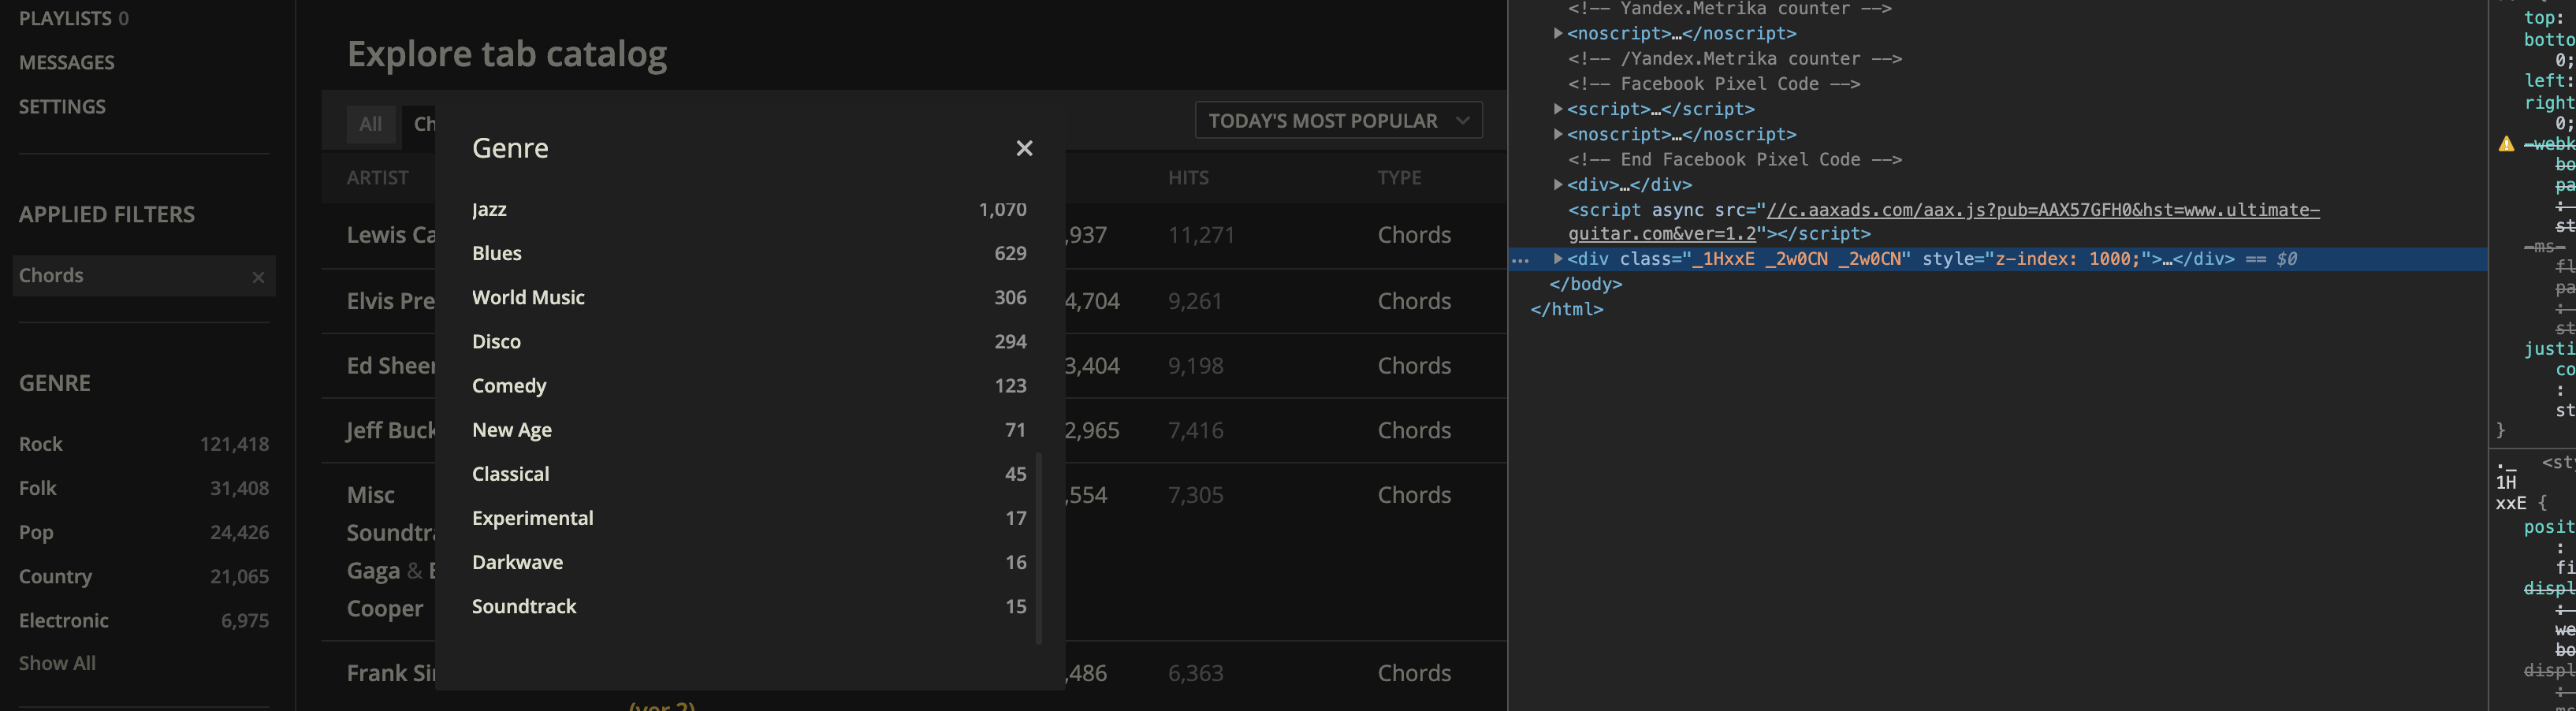

As requisite, chrome driver must be installed from  https://sites.google.com/a/chromium.org/chromedriver/home and copied to the same folder as this notebook (my version is copied, but it could not work on your computer). The driver must be compatible with the installed chrome version.


In `MacOS`, you must additionally allow mac-os to run non-known apps: pen System Preferences and click Security & Privacy. Change "Allow apps downloaded from" to Anywhere.



Let's create a Selenium Driver to access the page

In [301]:
import requests
from selenium import webdriver
import os
import re
import codecs
import pandas as pd

HTML_PATH = '/Users/xf20939/Desktop/PERFECT CHORDS by Ed Sheeran @ Ultimate-Guitar.Com.html'
CHORD_CLASS_NAME = '_3PpPJ OrSDI'
URL = 'https://tabs.ultimate-guitar.com/tab/ed-sheeran/perfect-chords-1956589'
INFO_CLASS_NAME = '_3rlxz'


In [118]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome("./chromedriver", options=options)

Now, we click of first 'Select All' button, to show a dialog with all the `genres`. 

When the button is clicked, the html of the page is modified to add a new `div` at the end of the page showing the dialog. Now, we can use `BeautifulSoup` to parse the html and look for the last `div`.

In [302]:
def fetchWebPageContent(URL):
    driver.get(URL)
#     show_all = driver.find_elements_by_xpath("//*[contains(text(), 'Show All')]")

#     genre_show_all = show_all[0];
    # driver.execute_script("arguments[0].click();", genre_show_all)
    page_source = driver.page_source
    return page_source

In [303]:
# get the top 1000 overview page and load it into a soup
def getTop100SongsSoup(): # should return soup for the Ultimate Guitar overview page
    print('stub')

In [304]:
# get links to all of the song pages
def getURLsForTop100Songs(): #Takes the soup of the Ultimate Guitar Overview page and converts it into a list of URLs (strings) for the most popular songs
    
    print('stub') 

In [305]:
def getSoup(HTML_PATH):
    chord_page_html =codecs.open(HTML_PATH, 'r')   
    chord_page_soup = BeautifulSoup(chord_page_html, 'html.parser')
    return chord_page_soup

In [314]:
def getChordsForSpecificSongPage(chord_page_soup, CHORD_CLASS_NAME):
    #Given a specific path to a HTML file, convert the HTML into a list of chords. Function takes in the BeautifulSoup object for a chord page, and the class name of spans in which chords are kept.
    spans = chord_page_soup.find_all('span', { 'class' : CHORD_CLASS_NAME })
    chords = [i.contents[0] for i in spans]
    return chords


In [315]:
def getSongInfo(chord_page_soup, INFO_CLASS_NAME):
    #takes in the soup of HTML and the class name for the HTML class in which the song info is kept
    song_info_spans = chord_page_soup.find_all('span', { 'class' : INFO_CLASS_NAME }) #finds span objects with the correct class
    song_info = [str(i.contents[0]) for i in song_info_spans] #finds contents of the span objects
    for stri in song_info:
        if '<span' in stri:
            song_info.remove(stri) #removes some excess spans that weirdly ended up in there... check on other songs
    ' '.join(song_info)
    return song_info
    

In [329]:
def createDF(song_information, chord_information):
    #populates a dataframe with chord info and song info (and later, the title)
    chords_df = pd.DataFrame()
    chords_df['song_information'] = [song_information]
    chords_df['chords'] = [chord_information]
    return chords_df
    

In [330]:
chord_page_soup = getSoup(HTML_PATH)
chords = getChordsForSpecificSongPage(chord_page_soup, CHORD_CLASS_NAME)
song_info = getSongInfo(chord_page_soup, INFO_CLASS_NAME)
chords_df =createDF(song_info, chords)

In [331]:
chords_df

song_information  \
0  [Capo: 1st fret\n, Play: G\n, Key: Ab\n,  \n, ...   

                                              chords  
0  [G, G, Em, C, D, G, Em, C, D, G, Em, C, G, D, ...

In [311]:
chords

['G',
 'G',
 'Em',
 'C',
 'D',
 'G',
 'Em',
 'C',
 'D',
 'G',
 'Em',
 'C',
 'G',
 'D',
 'G',
 'Em',
 'C',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'G',
 'G',
 'D/F#',
 'Em',
 'D',
 'C',
 'D',
 'G',
 'Em',
 'C',
 'D',
 'G',
 'Em',
 'C',
 'D',
 'G',
 'Em',
 'C',
 'G',
 'D',
 'G',
 'Em',
 'C',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'G',
 'G',
 'Em',
 'C',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'G/B',
 'C',
 'Dsus4',
 'D',
 'G',
 'G',
 'D/F#',
 'Em',
 'D',
 'C',
 'D',
 'G']

'Capo: 1st fret\n Play: G\n Key: Ab\n  \n For chords in original key transpose this chord sheet +1 (and "use flats").\n  \n Play this song with the regular shapes of the chords given in this song\n or use the ones that can be heard on the recording:\n  \n       E-A-D-G-B-e\n G     3-x-0-0-3(3)\n Em    0-2-2-0-3(3) (= Em7)\n C     x-3-2-0-3(3) (= Cadd9)\n [Coda]\n Dsus4 x-x-0-2-3-3 or x-x-0-0-3-3 (= a D chord which is neither major nor minor)\n G/B   x-2-0-0-0-3  (= G chord with a "b" as the root)\n D/F#  2-x-0-2-3-x  (= D chord with a "f#" as the root)\n  \n The "%" signs mean "repeat the bar before", so "| D | % |" = two bars of D.\n It\'s a common abbreviation. (Real Book etc.: https://www.swiss-jazz.ch/standards-jazz/AllOfMe.pdf)\n  \n ---------------------------------------------------------------------------------------------------\n  \n [Intro]\n  \n [Verse 1]\n            I found a love for me\n                Darling, just dive right in, and follow my lead\n                  We

In [279]:
# remove all spans
#join together.

['Play: G\n',
 'or use the ones that can be heard on the recording:\n',
 '      E-A-D-G-B-e\n',
 'Em    0-2-2-0-3(3) (= Em7)\n',
 '[Coda]\n',
 'G/B   x-2-0-0-0-3  (= G chord with a "b" as the root)\n',
 "It's a common abbreviation. (Real Book etc.: https://www.swiss-jazz.ch/standards-jazz/AllOfMe.pdf)\n",
 '---------------------------------------------------------------------------------------------------\n',
 '[Intro]\n',
 '<span class="_3PpPJ OrSDI" data-name="G" style="color: rgb(0, 0, 0);">G</span>',
 ' \n',
 '[Verse 1]\n',
 '          ',
 '              ',
 '                ',
 '        ',
 ' \n',
 '                                ',
 '            ',
 '             ',
 '            ',
 ' \n',
 '      ',
 '<span class="_3PpPJ OrSDI" data-name="C" style="color: rgb(0, 0, 0);">C</span>',
 '          ',
 '         ',
 ' \n',
 '| ',
 ' \n',
 '[Verse 2]\n',
 '                ',
 '              ',
 '           ',
 '         ',
 ' \n',
 '                             ',
 '             ',
 

In [218]:
def getSongNameFromSongPage(HTML_PATH):
    

['G',
 'G',
 'Em',
 'C',
 'D',
 'G',
 'Em',
 'C',
 'D',
 'G',
 'Em',
 'C',
 'G',
 'D',
 'G',
 'Em',
 'C',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'G',
 'G',
 'D/F#',
 'Em',
 'D',
 'C',
 'D',
 'G',
 'Em',
 'C',
 'D',
 'G',
 'Em',
 'C',
 'D',
 'G',
 'Em',
 'C',
 'G',
 'D',
 'G',
 'Em',
 'C',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'G',
 'G',
 'Em',
 'C',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'Em',
 'C',
 'G',
 'D',
 'G/B',
 'C',
 'Dsus4',
 'D',
 'G',
 'G',
 'D/F#',
 'Em',
 'D',
 'C',
 'D',
 'G']

In [52]:
top_songs_overview_page_soup = getTop100SongsSoup()



stub


### Let's create functions ion order to save data

! rm data.h5

import h5py
hf = h5py.File('data.h5', 'w')

hf.('genres', data=genres)


In [25]:
import pickle
 
with open('genres', 'wb') as genres_file:
  pickle.dump(genres, genres_file)

In [26]:
genres_loaded = 5
with open('genres', 'rb') as genres_file:
    genres_loaded = pickle.load(genres_file)

print_list(genres_loaded)

['FilterItem:code=4, name=Rock, filter_pattern=&&genres[]=4',
 'FilterItem:code=666, name=Folk, filter_pattern=&&genres[]=666',
 'FilterItem:code=14, name=Pop, filter_pattern=&&genres[]=14',
 'FilterItem:code=49, name=Country, filter_pattern=&&genres[]=49',
 'FilterItem:code=16, name=Electronic, filter_pattern=&&genres[]=16',
 'FilterItem:code=70, name=Rhythm And Blues, filter_pattern=&&genres[]=70',
 'FilterItem:code=8, name=Metal, filter_pattern=&&genres[]=8',
 'FilterItem:code=434, name=Contemporary R&b, filter_pattern=&&genres[]=434',
 'FilterItem:code=1016, name=Religious Music, filter_pattern=&&genres[]=1016',
 'FilterItem:code=45, name=Hip Hop, filter_pattern=&&genres[]=45',
 'FilterItem:code=19, name=Reggae, filter_pattern=&&genres[]=19',
 'FilterItem:code=84, name=Jazz, filter_pattern=&&genres[]=84',
 'FilterItem:code=99, name=Blues, filter_pattern=&&genres[]=99',
 'FilterItem:code=195, name=World Music, filter_pattern=&&genres[]=195',
 'FilterItem:code=85, name=Disco, filter_

In [27]:
%%writefile jl_io.py

import pickle

def to_file(obj, path):
    with open(path, 'wb') as file:
          pickle.dump(obj, file) 
            
def from_file(path):
    with open(path, 'rb') as file:
        return pickle.load(file)    

Overwriting jl_io.py


Written to a new file to be reused in later notebooks

In [28]:
import jl_io as io

In [31]:
io.to_file(genres, 'prueba')
print_list(io.from_file('prueba'))

['FilterItem:code=4, name=Rock, filter_pattern=&&genres[]=4',
 'FilterItem:code=666, name=Folk, filter_pattern=&&genres[]=666',
 'FilterItem:code=14, name=Pop, filter_pattern=&&genres[]=14',
 'FilterItem:code=49, name=Country, filter_pattern=&&genres[]=49',
 'FilterItem:code=16, name=Electronic, filter_pattern=&&genres[]=16',
 'FilterItem:code=70, name=Rhythm And Blues, filter_pattern=&&genres[]=70',
 'FilterItem:code=8, name=Metal, filter_pattern=&&genres[]=8',
 'FilterItem:code=434, name=Contemporary R&b, filter_pattern=&&genres[]=434',
 'FilterItem:code=1016, name=Religious Music, filter_pattern=&&genres[]=1016',
 'FilterItem:code=45, name=Hip Hop, filter_pattern=&&genres[]=45',
 'FilterItem:code=19, name=Reggae, filter_pattern=&&genres[]=19',
 'FilterItem:code=84, name=Jazz, filter_pattern=&&genres[]=84',
 'FilterItem:code=99, name=Blues, filter_pattern=&&genres[]=99',
 'FilterItem:code=195, name=World Music, filter_pattern=&&genres[]=195',
 'FilterItem:code=85, name=Disco, filter_

### We finally save the data

In [32]:
! ls

001_Exploring_data.ipynb chromedriver             jl_io.py
Scraping.ipynb           data.h5                  prueba
Scraping_02.ipynb        decades                  styles
__pycache__              genres


In [33]:
! rm genres prueba

In [34]:
! ls

001_Exploring_data.ipynb __pycache__              decades
Scraping.ipynb           chromedriver             jl_io.py
Scraping_02.ipynb        data.h5                  styles


In [43]:
! mkdir ../data

mkdir: ../data: File exists


In [54]:
io.to_file([genre.to_dictionary() for genre in genres],'../data/genres')
io.to_file([style.to_dictionary() for style in styles],'../data/styles')
io.to_file([decade.to_dictionary() for decade in decades],'../data/decades')

In [55]:
!ls 

001_Exploring_data.ipynb __pycache__              jl_io.py
Scraping.ipynb           chromedriver
Scraping_02.ipynb        data.h5


In [56]:
print_list(io.from_file('../data/genres'))

["{'code': '4', 'name': 'Rock', 'pattern': '&&genres[]=4'}",
 "{'code': '666', 'name': 'Folk', 'pattern': '&&genres[]=666'}",
 "{'code': '14', 'name': 'Pop', 'pattern': '&&genres[]=14'}",
 "{'code': '49', 'name': 'Country', 'pattern': '&&genres[]=49'}",
 "{'code': '16', 'name': 'Electronic', 'pattern': '&&genres[]=16'}",
 "{'code': '70', 'name': 'Rhythm And Blues', 'pattern': '&&genres[]=70'}",
 "{'code': '8', 'name': 'Metal', 'pattern': '&&genres[]=8'}",
 "{'code': '434', 'name': 'Contemporary R&b', 'pattern': '&&genres[]=434'}",
 "{'code': '1016', 'name': 'Religious Music', 'pattern': '&&genres[]=1016'}",
 "{'code': '45', 'name': 'Hip Hop', 'pattern': '&&genres[]=45'}",
 "{'code': '19', 'name': 'Reggae', 'pattern': '&&genres[]=19'}",
 "{'code': '84', 'name': 'Jazz', 'pattern': '&&genres[]=84'}",
 "{'code': '99', 'name': 'Blues', 'pattern': '&&genres[]=99'}",
 "{'code': '195', 'name': 'World Music', 'pattern': '&&genres[]=195'}",
 "{'code': '85', 'name': 'Disco', 'pattern': '&&genres[

In [57]:
print_list(io.from_file('../data/styles'))

["{'code': '24', 'name': 'Pop Rock', 'pattern': '&&subgenres[]=24'}",
 "{'code': '665', 'name': 'Singer-songwriter', 'pattern': '&&subgenres[]=665'}",
 "{'code': '3', 'name': 'Alternative Rock', 'pattern': '&&subgenres[]=3'}",
 "{'code': '9', 'name': 'Indie Rock', 'pattern': '&&subgenres[]=9'}",
 "{'code': '46', 'name': 'Indie Pop', 'pattern': '&&subgenres[]=46'}",
 "{'code': '1', 'name': 'Pop Punk', 'pattern': '&&subgenres[]=1'}",
 "{'code': '7', 'name': 'Hard Rock', 'pattern': '&&subgenres[]=7'}",
 "{'code': '813', 'name': 'Contemporary Folk', 'pattern': '&&subgenres[]=813'}",
 "{'code': '94', 'name': 'Folk Rock', 'pattern': '&&subgenres[]=94'}",
 "{'code': '1093', 'name': 'Folk Pop', 'pattern': '&&subgenres[]=1093'}",
 "{'code': '1087', 'name': 'Contemporary Country', 'pattern': '&&subgenres[]=1087'}",
 "{'code': '197', 'name': 'Country Pop', 'pattern': '&&subgenres[]=197'}",
 "{'code': '104', 'name': 'Electropop', 'pattern': '&&subgenres[]=104'}",
 "{'code': '82', 'name': 'Indie Fo

In [58]:
print_list(io.from_file('../data/decades'))

["{'code': '2010', 'name': '2010s', 'pattern': '&&decade[]=2010'}",
 "{'code': '2000', 'name': '2000s', 'pattern': '&&decade[]=2000'}",
 "{'code': '1990', 'name': '1990s', 'pattern': '&&decade[]=1990'}",
 "{'code': '1980', 'name': '1980s', 'pattern': '&&decade[]=1980'}",
 "{'code': '1970', 'name': '1970s', 'pattern': '&&decade[]=1970'}",
 "{'code': '1960', 'name': '1960s', 'pattern': '&&decade[]=1960'}",
 "{'code': '1950', 'name': '1950s', 'pattern': '&&decade[]=1950'}"]